In [ ]:
import numpy as np
import pickle
from facenet_models import FacenetModel
import skimage.io as io
from camera import take_picture
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [10]:
class Profile:
    def __init__(self, name):
        self.name = name
        self.descriptors = []
        self.mean_descriptor = 0
        
    def add_descriptor(self, descriptor):
        self.descriptors.append(descriptor)
        self.mean_descriptor = np.mean(self.descriptors, axis=0)

In [11]:
# from profile import Profile

class Database:
     
    # initialize database
    def __init__(self):
        self.database = {}
        self.model = FacenetModel()
        
    # add image descriptor to profile, or create profile if it doesn't exist    
    def add_image(self, name, img):
        boxes, probabilities, landmarks = self.model.detect(img)
        descriptor = self.model.compute_descriptors(img, boxes)
        if name in self.database:
            self.database[name].add_descriptor(descriptor)
        else:
            profile = Profile(name)
            profile.add_descriptor(descriptor)
            self.database[name] = profile
     
    def remove_profile(self, name):
        self.database.pop(name)
        
    def load_database(self):
        with open("./database.pkl", mode="rb") as db:
            self.database = pickle.load(db)
            
    def save_database(self):
        with open("./database.pkl", mode="wb") as db:
            pickle.dump(self.database, db)
            
    # compare input to mean descriptors in database         
    def find_match(self, descriptor):
        #to change
        cutoff = 0.3
        dists = []
        names = []
        for name, value in self.database.items():
            dists.append(cos_distance(value.mean_descriptor, descriptor))
            names.append(name)
        if np.min(dists) < cutoff:
            return names[np.argmin(dists)]
        return "Unknown??"

In [1]:
def cos_distance(descriptor_1, descriptor_2):
    return 1 - descriptor_1 @ descriptor_2 / (np.linalg.norm(descriptor_1) * np.linalg.norm(descriptor_2))

In [ ]:
# turn png/jpeg file into np array
def upload_picture(file_path):
    image = io.imread(file_path)
    if image.shape[-1] == 4:
    # Image is RGBA, where A is alpha -> transparency
    # Must make image RGB.
        image = image[..., :-1]  # png -> RGB
    return image

In [18]:
img_array = take_picture()

In [19]:
db = Database()
db.add_image("Kat", img_array)

In [ ]:
# plot image and label faces
def detect_faces(image):
    model = FacenetModel()
    boxes, probabilities, landmarks = model.detect(image)
    descriptor = model.compute_descriptors(image, boxes)

    fig, ax = plt.subplots()
    ax.imshow(image)

    for des, box, prob, landmark in zip(descriptor, boxes, probabilities, landmarks):
        # draw the box on the screen
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
    
        # Get the landmarks/parts for the face in box d.
        # Draw the face landmarks on the screen.
        for i in range(len(landmark)):
            ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")
        
        # add name labels to each box
        plt.text(box[:2][0],box[:2][1], db.find_match(des),color="white")

<IPython.core.display.Javascript object>


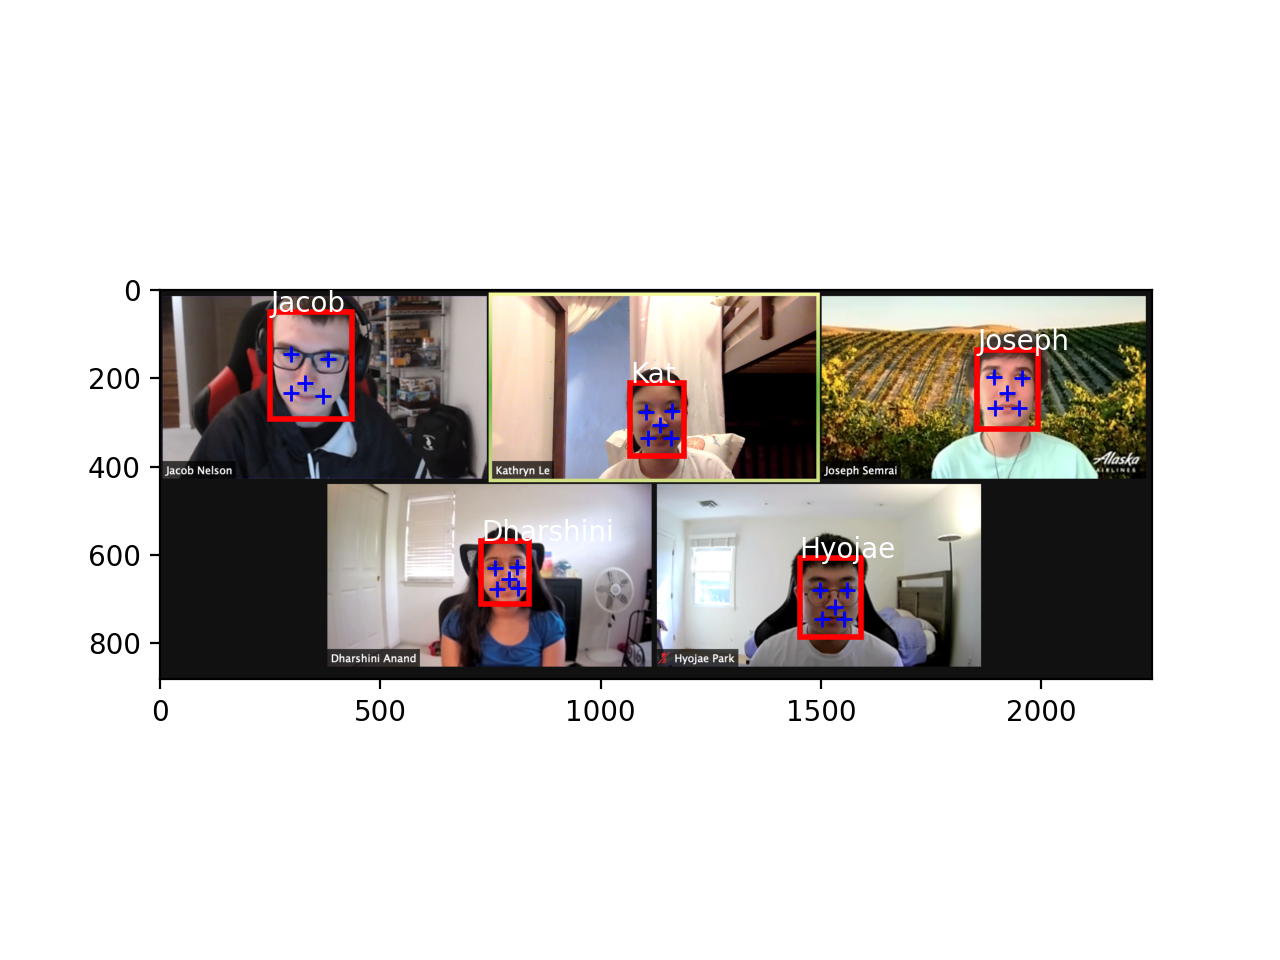

In [29]:
model = FacenetModel()
boxes, probabilities, landmarks = model.detect(image)
descriptor = model.compute_descriptors(image, boxes)

fig, ax = plt.subplots()
ax.imshow(image)

for des, box, prob, landmark in zip(descriptor, boxes, probabilities, landmarks):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(landmark)):
        ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")

    plt.text(box[:2][0],box[:2][1], db.find_match(des),color="white")